# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [997]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [998]:
df = pd.read_csv('../data/checker_submits.csv', parse_dates=['timestamp'])

In [999]:
df.head()

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104


In [1000]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.day_of_week
df = df.drop('timestamp', axis = 1)
df.head()

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4


OneHotEncoder используется для преобразования категориальных или текстовых данных в числа, которые наши предсказательные модели понимают лучше. 

Этот кодировщик берёт столбец с категориальными данными, который был предварительно закодирован в признак, и создаёт для него несколько новых столбцов. Числа заменяются на единицы и нули, в зависимости от того, какому столбцу какое значение присуще

sparse_output=False: Указывает, что результат кодирования должен быть представлен в виде плотного массива (обычный массив NumPy), а не разреженной матрицы.

drop='first': Удаляет первую категорию для каждой колонке, чтобы избежать мультиколлинеарности (ситуации, когда одна колонка полностью зависит от других в наборе данных).

In [1001]:

encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' убирает одну категорию, чтобы избежать мультиколлинеарности
encoded_data = encoder.fit_transform(df[['uid', 'labname']])

# Преобразование в DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['uid', 'labname']))

# Удаление исходных колонок и добавление новых
df = df.drop(['uid', 'labname'], axis=1)
df = pd.concat([df, encoded_df], axis=1)
df

,numTrials,hour,dayofweek,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,6,20,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,7,20,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,8,20,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1002]:
# нормализуем некоторые столбцы
scaler = StandardScaler()
df[['numTrials', 'hour']] = scaler.fit_transform(df[['numTrials', 'hour']])
df

,numTrials,hour,dayofweek,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1003]:
df.to_csv('../data/dayofweek.csv', index=False)

Оценка точность "наивного алгоритма", который всегда предсказывает самый популярный класс (класс с максимальной частотой в целевой переменной).

In [1004]:
most_popular_class = df['dayofweek'].mode()[0]

# Предсказание этого класса для всех наблюдений
df['naive_prediction'] = most_popular_class

# Рассчитываем точность
accuracy = (df['dayofweek'] == df['naive_prediction']).mean()

accuracy

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [1005]:
X = df.drop(['dayofweek', 'naive_prediction'], axis = 1)
y = df['dayofweek']
logreg = LogisticRegression(random_state = 21, fit_intercept=False)
logreg.fit(X,y)
prediction = logreg.predict(X)


In [1006]:
accuracy_score(y, prediction)

0.6239620403321471

In [1007]:
df

,numTrials,hour,dayofweek,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,naive_prediction
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
1682,-0.629151,0.945382,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
1683,-0.597248,0.945382,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
1684,-0.565345,0.945382,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3


Преобразование коэффициентов модели логистической регрессии (logreg.coef_) в таблицу DataFrame для удобного представления и анализа.

In [1008]:
pd.DataFrame(logreg.coef_)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.016563,0.063261,-0.805965,-1.210146,-0.149894,0.125463,-0.271886,0.943112,-0.647855,0.779184,...,1.220034,0.636033,0.644594,-0.278590,0.057336,-0.517923,-1.748735,-0.396641,-0.772347,0.239649
1,0.542276,-0.311632,-0.859172,0.349261,-0.085068,-0.007410,1.744647,0.905167,-0.470376,-0.009979,...,-0.119244,-0.057433,-0.049838,0.095708,0.116032,-0.672150,-1.148246,1.889022,1.517119,0.598208
2,0.689756,0.503251,-0.716795,1.304682,-0.213316,-0.526156,-0.901677,-2.182905,-0.574585,-0.789190,...,-0.129299,-0.022727,-0.019167,-0.424220,0.088176,0.367246,-0.518025,-0.787463,1.851162,0.129685
3,0.856710,-0.147062,2.014497,0.973336,-0.294744,0.048295,-1.106778,-1.938869,0.789184,0.816515,...,-0.099829,-0.098725,-0.081448,-0.802957,-0.638913,0.127592,0.706112,0.586389,1.445665,1.685589
4,-0.689653,0.006212,-0.817878,-0.558782,-0.611245,-1.393148,-1.119485,-1.136544,-0.668072,-0.803533,...,-0.287623,-0.053968,-0.058102,-0.647899,-0.996729,-0.629425,1.066942,-1.417664,-1.806793,-0.544435
5,-0.668036,-0.005496,-0.861225,-0.184015,-1.101815,-1.211564,0.255130,2.076342,-0.257809,-1.558146,...,-0.284566,-0.028781,-0.030898,0.770937,1.526348,0.469646,2.205608,-0.569906,-1.169958,-0.953759
6,-0.714490,-0.108534,2.046539,-0.674336,2.456082,2.964521,1.400048,1.333696,1.829513,1.565149,...,-0.299474,-0.374399,-0.405142,1.287022,-0.152251,0.855014,-0.563656,0.696265,-1.064847,-1.154937


Построение горизонтального столбчатого графика для топ-N наиболее важных признаков.
    
    Args:
    - coefs (np.ndarray): Матрица коэффициентов модели (размерности [n_classes, n_features]).
    - feature_names (list): Список имен признаков.
    - top_n (int): Количество признаков для отображения.


In [1009]:
def plot_features(coefs, features, n=10):

    coefs /= coefs.sum() 
    indices = coefs.argsort()[::-1][:n] 
    
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.barh(np.arange(n), coefs[indices])
    ax.set_yticks(np.arange(n))
    ax.set_yticklabels(features[indices])
    ax.invert_yaxis() 
    plt.show()

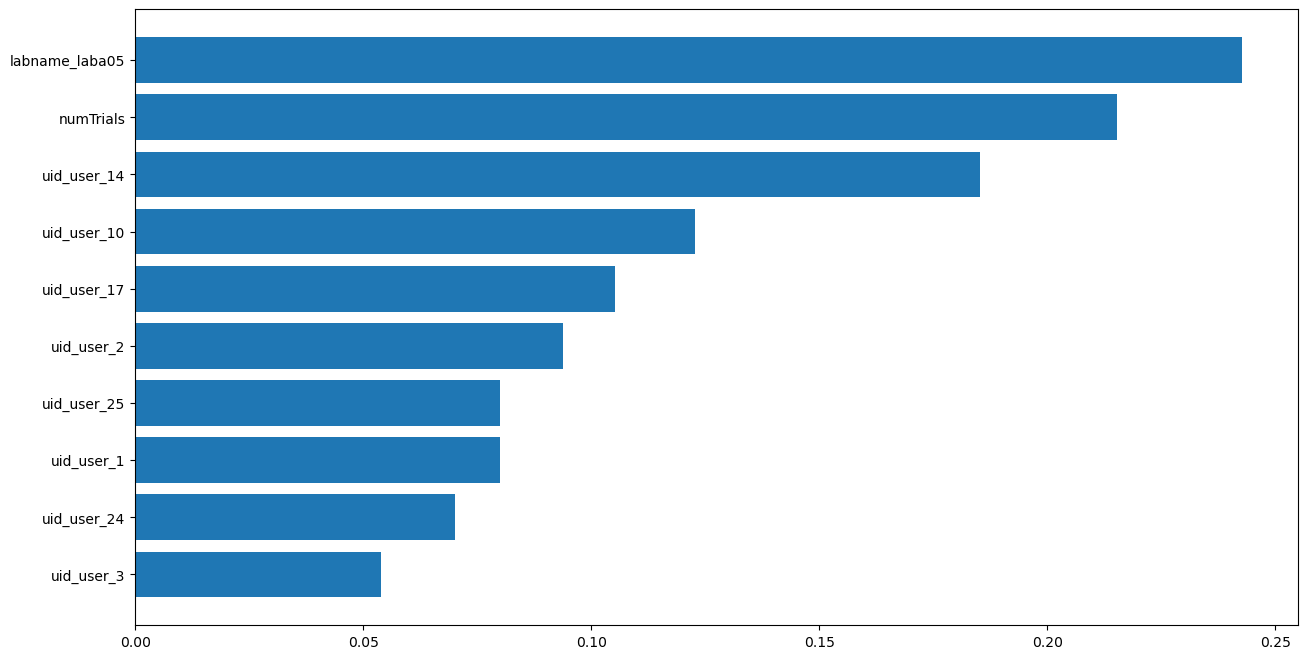

In [1010]:
feature_names = X.columns
importance = logreg.coef_.mean(axis=0)

plot_features(importance, feature_names)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [1011]:
svc = SVC(probability=True, random_state=21)

In [1012]:
param_grid = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}
cv = GridSearchCV(svc, param_grid, scoring='accuracy')
cv.fit(X, y)
cv.best_params_

{'kernel': 'poly'}

In [1013]:
clf = SVC(kernel='poly', probability=True, random_state=21)
svc = clf.fit(X,y)
y_svc = svc.predict(X)
accuracy_score(y, y_svc)

0.8594306049822064

In [1014]:
clf = SVC(kernel='linear', probability=True, random_state=21)
svc = clf.fit(X,y)
y_svc = svc.predict(X)
accuracy_score(y, y_svc)

0.7058125741399762

In [1015]:
clf = SVC(kernel='rbf', probability=True, random_state=21)
svc = clf.fit(X,y)
y_svc = svc.predict(X)
accuracy_score(y, y_svc)

0.8546856465005931

In [1016]:
clf = SVC(kernel='sigmoid', probability=True, random_state=21)
svc = clf.fit(X,y)
y_svc = svc.predict(X)
accuracy_score(y, y_svc)

0.3849347568208778

Обёртка OneVsRestClassifier

In [1017]:
svc = OneVsRestClassifier(SVC(kernel='linear', random_state=21))
svc.fit(X, y)

OneVsRestClassifier(estimator=SVC(kernel='linear', random_state=21))

Коэффициенты линейной модели

In [1018]:
coefs = svc.estimators_[0].coef_

Суммарная важность признаков (по абсолютным значениям)

In [1019]:
feature_importance = np.sum(np.abs(coefs), axis=0)

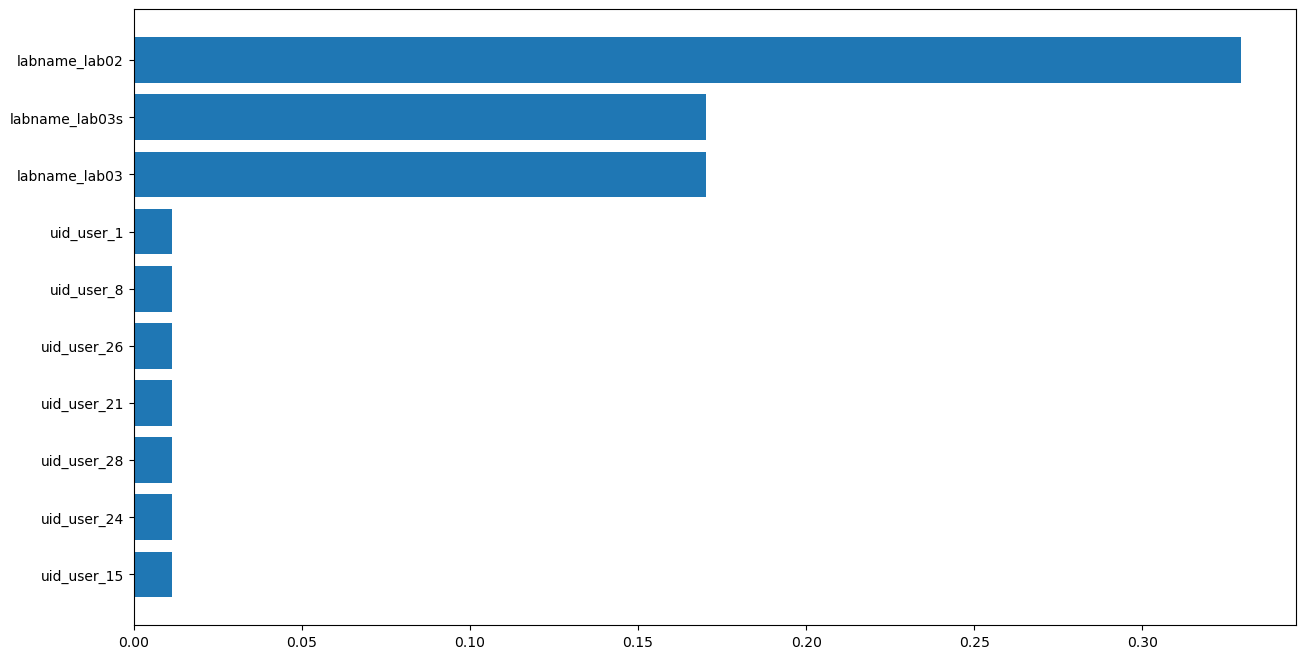

In [1020]:
plot_features(feature_importance, feature_names)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [1021]:
model_tree = DecisionTreeClassifier(max_depth=4, random_state=21)
model_tree.fit(X, y)
prediction = model_tree.predict(X)
accuracy_score(y, prediction)

0.5516014234875445

In [1022]:
model_tree = DecisionTreeClassifier(max_depth=5, random_state=21)
model_tree.fit(X, y)
prediction = model_tree.predict(X)
accuracy_score(y, prediction)

0.6109134045077106

In [1023]:
model_tree = DecisionTreeClassifier(max_depth=8, random_state=21)
model_tree.fit(X, y)
prediction = model_tree.predict(X)
accuracy_score(y, prediction)

0.7502965599051008

In [1024]:
model_tree = DecisionTreeClassifier(max_depth=15, random_state=21)
model_tree.fit(X, y)
prediction = model_tree.predict(X)
accuracy_score(y, prediction)

0.9460260972716489

In [1025]:
model_tree = DecisionTreeClassifier(max_depth=22, random_state=21)
model_tree.fit(X, y)
prediction = model_tree.predict(X)
accuracy_score(y, prediction)

0.9922894424673784

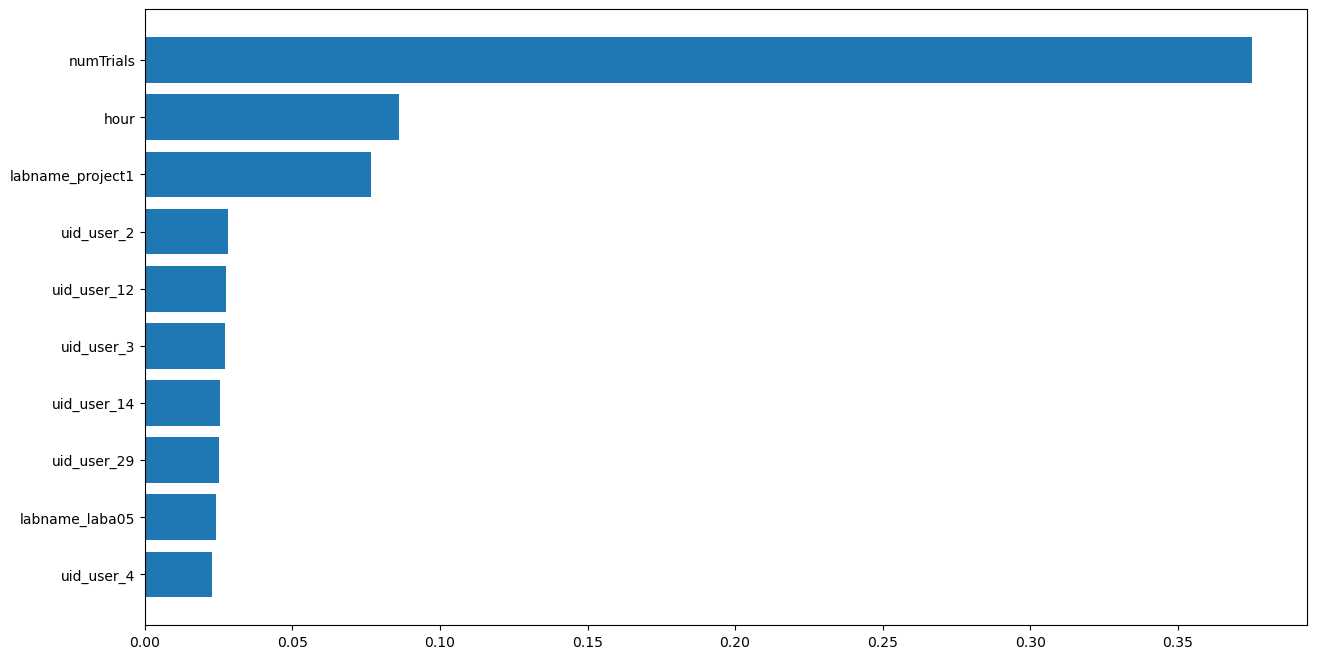

In [1026]:
plot_features(model_tree.feature_importances_, feature_names)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [1027]:
model_random_forest = RandomForestClassifier(n_estimators=100,
                                             max_depth=25,
                                             random_state=21)
model_random_forest.fit(X, y)
prediction = model_random_forest.predict(X)
accuracy_score(y, prediction)

1.0

In [1028]:
model_random_forest = RandomForestClassifier(n_estimators=100,
                                             max_depth=15,
                                             random_state=21)
model_random_forest.fit(X, y)
prediction = model_random_forest.predict(X)
accuracy_score(y, prediction)

0.9744958481613286

In [1029]:
model_random_forest = RandomForestClassifier(n_estimators=10,
                                             max_depth=25,
                                             random_state=21)
model_random_forest.fit(X, y)
prediction = model_random_forest.predict(X)
accuracy_score(y, prediction)

0.9952550415183867

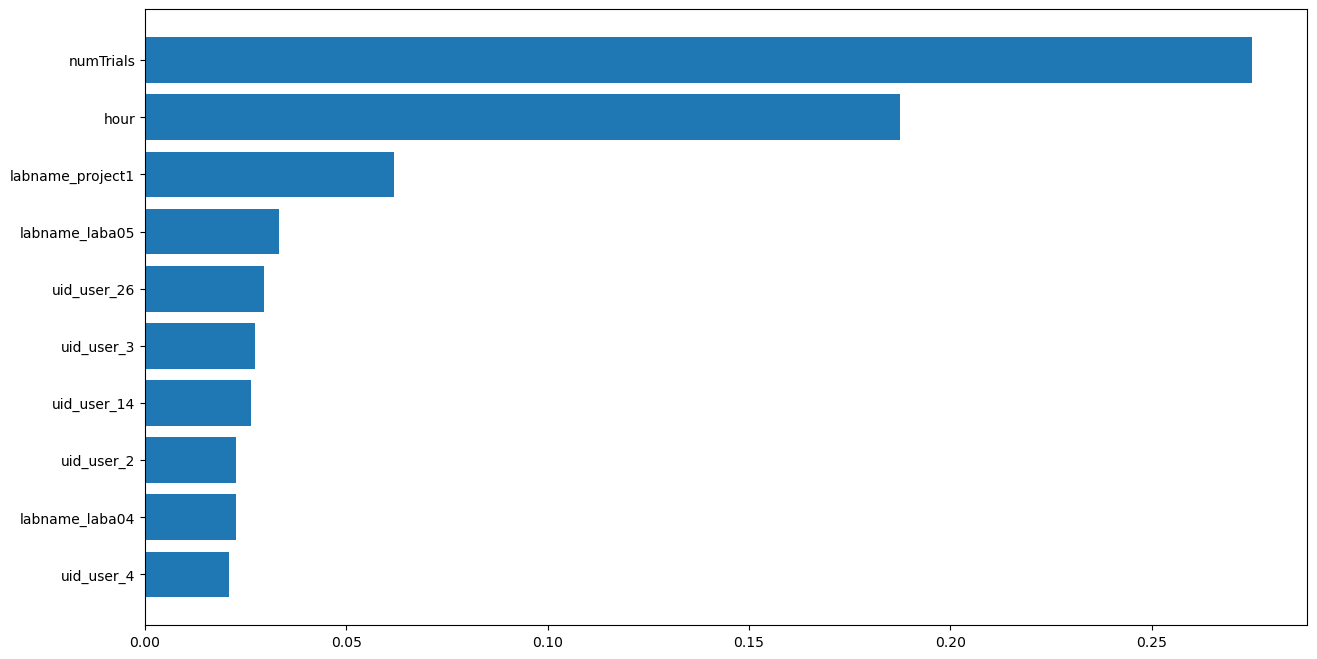

In [1030]:
plot_features(model_random_forest.feature_importances_, feature_names)